# Navigation Project

---

### 1. Start the Environment

The banana environment must be saved in the Workspace to be accessed at the file path provided below.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The code cell below prints some information about the environment. This will give you an idea of what the state space looks like and how many actions are available to your agent.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Import necessary packages

In the next code cell, we import the packages we need to build our DQN agent and to plot the agent's progress in each episode of the task.

In [5]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

### 4. Let's train an agent!

The code cell below will create an agent that uses the DQN algorithm to learn about the banana environment. You'll be able to see the average score across each block of 100 episodes as the training is taking place. At the end of the training, you'll see a plot of the agent's performance across the training (plotted with episode on the x-axis and reward on the y-axis).

Episode 100	Average Score: 0.95
Episode 200	Average Score: 4.07
Episode 300	Average Score: 7.97
Episode 400	Average Score: 10.89
Episode 484	Average Score: 13.03
Environment solved in 384 episodes!	Average Score: 13.03


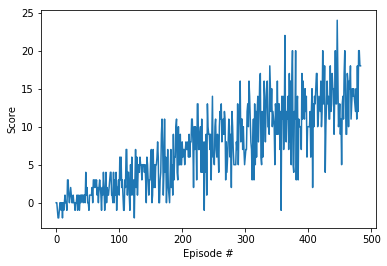

In [6]:
#Set up the Agent
# dqn_agent file must be saved in the same directory as this file
from dqn_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

# Train the Agent with DQN
def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    # Note: deque is a list-like container with fast appends and pops on either end
    eps = eps_start                    # initialize epsilon
    
    # For each episode, run the agent through the environment until done or max_t
    # (whichever comes first)
    for i_episode in range(1, n_episodes+1):
        
        # Reset the environment to start fresh, and observe the state
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        
        # Reset score at the beginning of each episode to collect 1 score per episode
        score = 0
        
        # Move around the environment until done or max_t (whichever comes first)
        for t in range(max_t):
            
            # Choose an action - rules for choosing action are in dqn_agent.
            action = agent.act(state, eps)
            
            # Observe resulting next state, reward, and done status.
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            # Update the agent based on the action that was taken.  
            # Rules for updating are in dqn_agent.
            agent.step(state, action, reward, next_state, done)
            
            # Get ready for next step:
            state = next_state
            score += reward
            
            # Terminate episode if done.
            if done:
                break 
                
        scores_window.append(score)       # save most recent score for avg over 100 eps
        scores.append(score)              # save most recent score for plotting all eps
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        # Print 3 things: (1) average over the last 100 episodes, (2) average for 100 episode block
        # (3) how many training episodes required to solve the task
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()


# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()